# 데이터 전처리


In [25]:
import numpy as np 

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [26]:
# numpy의 column_stack함수와 concatenate함수를 이용해 데이터 처리하기 
fish_data = np.column_stack((fish_length, fish_weight)) # column_stack의 튜플로 전달해야 함. numpy.column_stack(tup)
fish_target = np.concatenate((np.ones(35), np.zeros(14))) #concatenate 또한 튜플로 전달해야 함
print(fish_data[:5])
print(fish_target)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


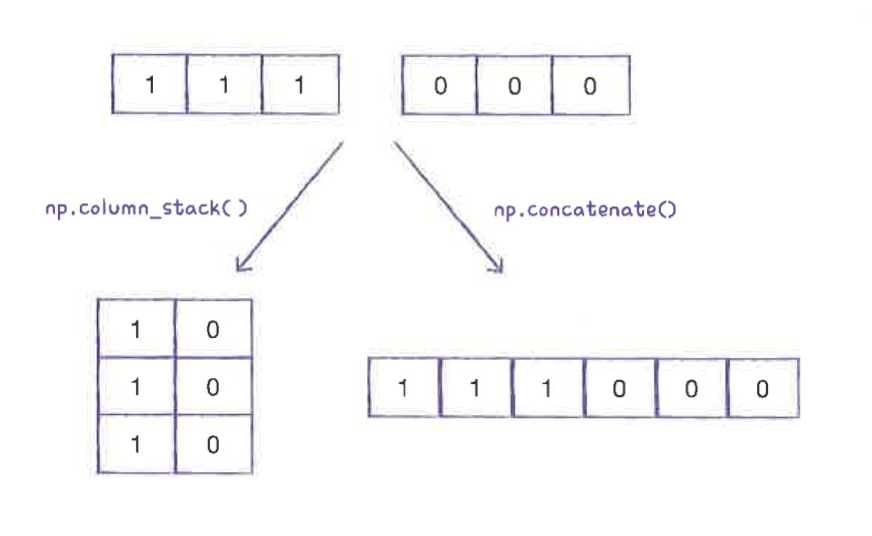

In [27]:
#사이킷런 라이브러리를 이용하여 훈련 데이터 세트와 테스트 데이터 세트 나눈기 (train_test_split)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42) 
# train_test_split은 데이터를 나누기 전에 랜덤으로 섞어 줌
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [28]:
# 테스트 데이터 중 10개가 도미이고 3개가 빙어이다. 샘플링 편향이 일어났음. 
# train_test_split() 함수안의 stratify 매개변수를 이용해 클래스 비율에 맞게 데이터를 나눌 수 있음
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))

print(kn.predict([[25, 150]])) # 도미 데이터

1.0
[0.]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will 

정확도가 100% 나오지만 새로운 도미 데이터에 대해 빙어라고 예측하는 것을 확인할 수 있음 


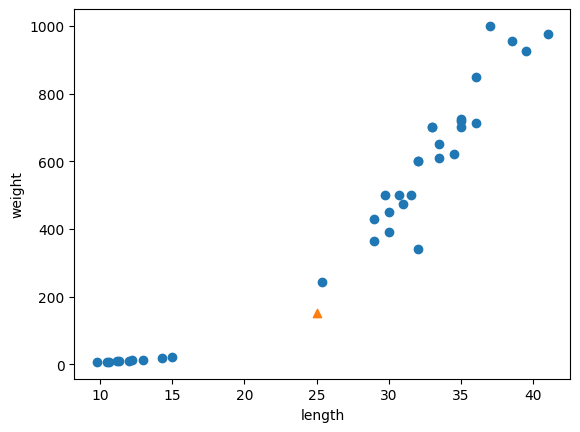

In [30]:
# 샘플 데이터 어디에 있는지 산점도 그래프로 확인하기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
distances, indexes = kn.kneighbors([[25, 150]]) # kneighbors() 매서드를 이용해 이웃까지의 거리와 index값 반환(n_neighbors의 기본값이 5이므로 5개의 이웃이 반환)
print(distances, indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


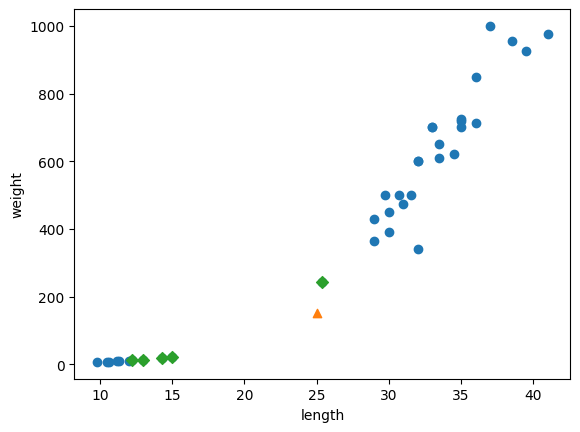

In [32]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

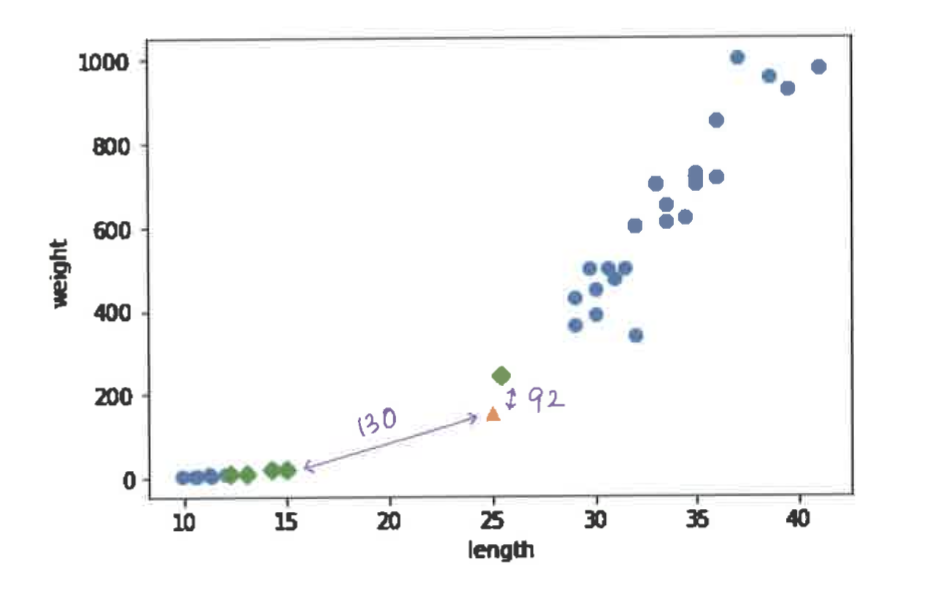

x축의 범위와 y축의 범위가 다르다는 것을 확인할 수 있다.
따라서 스케일을 동일하게 맞출 필요가 있다.

### 데이터 전처리
표준점수(standard score)를 이용하여 스케일 맞추기

열 기준으로 평균과 표준편차를 구하고 각 데이터에서 평균을 빼고 표준편차로 나누어 스케일링한다.

In [33]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [34]:
train_scaled = (train_input - mean) / std

## 브로드캐스팅
브로드캐스팅이란?

차원에 맞게 스칼라 값을 벡터로 확장하여 걔산하게 해줌

### 전처리 데이터로 모델 훈련하기

훈련 데이터들을 표준화 하였기 때문에 예측하고자 하는 데이터, 테스트 데이터 또한 표준화를 진행해야 한다.

In [35]:
new = ([25, 150] - mean) / std
test_scaled = (test_input - mean) / std
kn.fit(train_scaled, train_target)
print(kn.score(test_scaled, test_target))
print(kn.predict([new]))



1.0
[1.]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will 

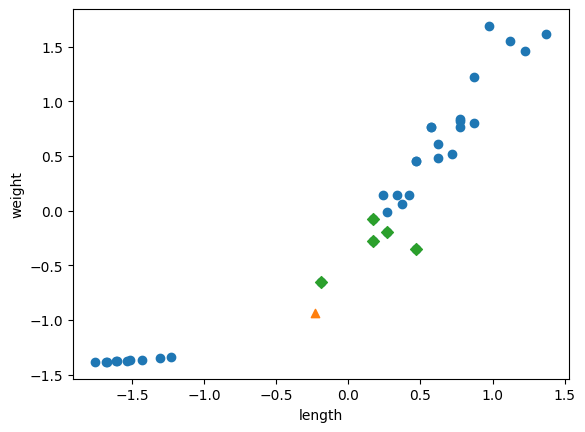

In [37]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()